# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:
idade_mae_municipio = sinasc_raw[['IDADEMAE', 'munResNome']]
idade_mae_municipio.head()

,IDADEMAE,munResNome
0,19,Alta Floresta D'Oeste
1,29,Alta Floresta D'Oeste
2,37,Alta Floresta D'Oeste
3,30,Alto Alegre dos Parecis
4,30,Alta Floresta D'Oeste


In [4]:
#idade_mae_municipio.groupby('munResNome').mean()

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [5]:
tarefa_2_df = sinasc_raw[['DTNASC', 'PESO', 'SEXO', 'ESCMAE']]
tarefa_2_df = tarefa_2_df[tarefa_2_df['DTNASC'] == '2019-06-23']
tarefa_2_df.head()

,DTNASC,PESO,SEXO,ESCMAE
1337,2019-06-23,3525,Feminino,8 a 11 anos
1338,2019-06-23,3325,Masculino,8 a 11 anos
1339,2019-06-23,2815,Masculino,4 a 7 anos
1340,2019-06-23,2975,Feminino,4 a 7 anos
1356,2019-06-23,2620,Masculino,12 anos ou mais


In [6]:
tarefa_2_df = tarefa_2_df.drop('DTNASC', axis=1)
tarefa_2_df.head()

,PESO,SEXO,ESCMAE
1337,3525,Feminino,8 a 11 anos
1338,3325,Masculino,8 a 11 anos
1339,2815,Masculino,4 a 7 anos
1340,2975,Feminino,4 a 7 anos
1356,2620,Masculino,12 anos ou mais


In [7]:
tarefa_2_df.groupby(['ESCMAE', 'SEXO']).mean()

PESO
ESCMAE          SEXO                  
12 anos ou mais Feminino   3172.500000
                Masculino  3218.818182
4 a 7 anos      Feminino   2763.333333
                Masculino  3295.000000
8 a 11 anos     Feminino   2949.454545
                Masculino  3371.818182

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [8]:
tarefa_3_df = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
tarefa_3_df.head(2)

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste


In [9]:
tarefa_3_df['munResNome'].value_counts().sort_values(ascending=True).head(5)

munResNome
Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: count, dtype: int64

In [10]:
tarefa_3_df = tarefa_3_df[tarefa_3_df['munResNome'] == 'Município ignorado - RO']

In [11]:
tarefa_3_df.agg({'IDADEMAE':['mean', 'min','max'], 'IDADEPAI':['mean', 'min','max']}).transpose()

,mean,min,max
IDADEMAE,24.0,24.0,24.0
IDADEPAI,22.0,22.0,22.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [12]:
tarefa_4_df = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome', 'DTNASC', 'QTDFILVIVO']]
tarefa_4_df.head(5)

,IDADEMAE,IDADEPAI,munResNome,DTNASC,QTDFILVIVO
0,19,26.0,Alta Floresta D'Oeste,2019-02-19,0.0
1,29,24.0,Alta Floresta D'Oeste,2019-02-21,1.0
2,37,32.0,Alta Floresta D'Oeste,2019-02-25,2.0
3,30,24.0,Alto Alegre dos Parecis,2019-03-20,0.0
4,30,27.0,Alta Floresta D'Oeste,2019-03-23,1.0


In [13]:
def marco(valor):
    mes = list(valor)
    valor = mes[5] + mes[6]
    valor = str(valor)

    if valor == '03':
        mes = 'Março'
        return mes
    else:
        return ''

marco('2019-03-19')

'Março'

In [14]:
tarefa_4_df['Março'] = tarefa_4_df['DTNASC'].apply(marco)

C:\Users\Soldado\AppData\Local\Temp\ipykernel_3124\836858443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tarefa_4_df['Março'] = tarefa_4_df['DTNASC'].apply(marco)


In [15]:
tarefa_4_df = tarefa_4_df[tarefa_4_df['Março'] == 'Março']

In [16]:
tarefa_4_df['munResNome'].value_counts().head(1)

munResNome
Porto Velho    744
Name: count, dtype: int64

In [17]:
tarefa_4_df = tarefa_4_df[tarefa_4_df['munResNome'] == 'Porto Velho']
tarefa_4_df.head()

,IDADEMAE,IDADEPAI,munResNome,DTNASC,QTDFILVIVO,Março
612,19,NaN,Porto Velho,2019-03-09,0.0,Março
700,19,NaN,Porto Velho,2019-03-28,1.0,Março
3232,34,NaN,Porto Velho,2019-03-11,0.0,Março
3238,24,NaN,Porto Velho,2019-03-13,1.0,Março
6818,38,41.0,Porto Velho,2019-03-01,2.0,Março


In [18]:
tarefa_4_df.agg({'QTDFILVIVO':['mean', 'min','max']})

,QTDFILVIVO
mean,1.295056
min,0.000000
max,9.000000


In [19]:
tarefa_4_df.agg({'IDADEMAE':['mean', 'min','max'], 'IDADEPAI':['mean', 'min','max']}).transpose()

,mean,min,max
IDADEMAE,26.596774,14.0,44.0
IDADEPAI,34.629032,19.0,62.0


---

# **SINASC** • Gravidez na adolescencia

In [20]:
Sinasc = pd.read_csv('Sinasc.csv')
Sinasc = Sinasc.drop('Unnamed: 0', axis=1)

# Mulheres que tiveram filhos antes dos dezoito anos

In [21]:
Sinasc.head(5)

,Unnamed: 0.1,IDADEMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,...,QTDPARTCES,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Status
0,0,18,1 a 3 anos,0.0,0.0,37 a 41 semanas,Única,Vaginal,3,2019-03-28,...,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,De 17 à 18
1,1,18,4 a 7 anos,0.0,2.0,37 a 41 semanas,Única,Vaginal,4,2019-04-10,...,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,De 17 à 18
2,2,18,4 a 7 anos,1.0,0.0,37 a 41 semanas,Única,Cesáreo,2,2019-04-23,...,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,De 17 à 18
3,3,18,8 a 11 anos,0.0,0.0,37 a 41 semanas,Única,Vaginal,4,2019-04-24,...,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,De 17 à 18
4,4,14,4 a 7 anos,0.0,0.0,37 a 41 semanas,Única,Cesáreo,4,2019-05-28,...,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,De 13 à 14


In [22]:
total1, _ = sinasc_raw.shape
idades = Sinasc.dropna() # Per aalizzare la differenza tra l'uomo e la donna
total2, _ = Sinasc.shape
Sinasc.shape 

print(f'{round(((total2 / total1) * 100), 0)}% das mulheres tiveram filho muito jovem.')

12.0% das mulheres tiveram filho muito jovem.


In [23]:
Sinasc.Status.value_counts(normalize=True)

Status
De 17 à 18    0.632564
De 15 à 16    0.308172
De 13 à 14    0.059264
Name: proportion, dtype: float64

# Diferença de idade entre mãe e pai

In [24]:
idades = Sinasc.dropna() # Per aalizzare la differenza tra l'uomo e la donna
pais, _ = idades.shape
idades.shape

(601, 32)

In [25]:
pai_maior_18, _ = idades[idades['IDADEPAI'] > 18].shape

In [26]:
print(f'E cerca {round(((pai_maior_18 / pais) * 100), 0)}% das menores de idade se relacionam com homens maiores de idade.')

E cerca 86.0% das menores de idade se relacionam com homens maiores de idade.


In [30]:
idades['DIF'] = idades['IDADEPAI'] - idades['IDADEMAE']

idades.agg({'IDADEMAE':['min','max', 'mean'], 'IDADEPAI':['min','max', 'mean'], 'DIF':['min','max', 'mean']})

C:\Users\Soldado\AppData\Local\Temp\ipykernel_3124\1532835131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idades['DIF'] = idades['IDADEPAI'] - idades['IDADEMAE']


,IDADEMAE,IDADEPAI,DIF
min,13.000000,15.000000,-1.000000
max,18.000000,50.000000,32.000000
mean,16.826955,23.019967,6.193012


In [31]:
df = idades[['Status', 'DIF', 'IDADEPAI']]
df.groupby(['Status']).mean()

,DIF,IDADEPAI
Status,,
De 13 à 14,8.565217,22.478261
De 15 à 16,6.873626,22.521978
De 17 à 18,5.742424,23.280303


# Municípios

In [32]:
municipios_lista = idades.munResNome.unique().tolist()
media_diferenca = []
media_mae = []
media_pai = []
max_mae_lista = []
min_mae_lista = []
max_pai_lista = []
min_pai_lista = []

In [33]:
# Funções

def medias(mun):
    df = idades[idades['munResNome'] == mun]

    media_dif = df['DIF'].mean()
    media_diferenca.append(round(media_dif, 0 ))

    media_idademae = df['IDADEMAE'].mean() 
    media_mae.append(round(media_idademae, 2)) 

    media_idadepae = df['IDADEPAI'].mean()
    media_pai.append(round(media_idadepae, 0))

def max_min(mun):
    df = idades[idades['munResNome'] == mun]

    max_mae = df['IDADEMAE'].max()
    max_mae_lista.append(round(max_mae, 0 ))
    min_mae = df['IDADEMAE'].min()
    min_mae_lista.append(round(min_mae, 0 ))


    max_pai = df['IDADEPAI'].max()
    max_pai_lista.append(round(max_pai, 0 ))
    min_pai = df['IDADEPAI'].min()
    min_pai_lista.append(round(min_pai, 0 ))

In [34]:
for x in municipios_lista:
    medias(mun=x)
    max_min(mun=x)

In [35]:
Data = pd.DataFrame({'Municípios' : municipios_lista,
              'Média da diferença' : media_diferenca,
              'Média idade da mães' : media_mae,
              'Média idade do pai' : media_pai,
              'Mínima Mãe)' : min_mae_lista,
              'Máxima Pai': max_pai_lista})

In [36]:
Data.head(5)

,Municípios,Média da diferença,Média idade da mães,Média idade do pai,Mínima Mãe),Máxima Pai
0,Alta Floresta D'Oeste,7.0,16.69,24.0,14,35.0
1,Cacoal,6.0,16.93,23.0,14,41.0
2,Espigão D'Oeste,7.0,16.56,24.0,14,37.0
3,Pimenta Bueno,6.0,16.81,23.0,13,50.0
4,Ji-Paraná,5.0,16.73,22.0,14,37.0


In [37]:
Data['Média da diferença'].mean()

6.6

In [38]:
Data[Data['Média da diferença'] > 10].head(10)

,Municípios,Média da diferença,Média idade da mães,Média idade do pai,Mínima Mãe),Máxima Pai
29,Novo Horizonte do Oeste,11.0,16.75,28.0,16,31.0
34,Nova Mamoré,11.0,17.67,29.0,17,39.0
41,Cacaulândia,17.0,18.00,35.0,18,35.0


<Axes: >

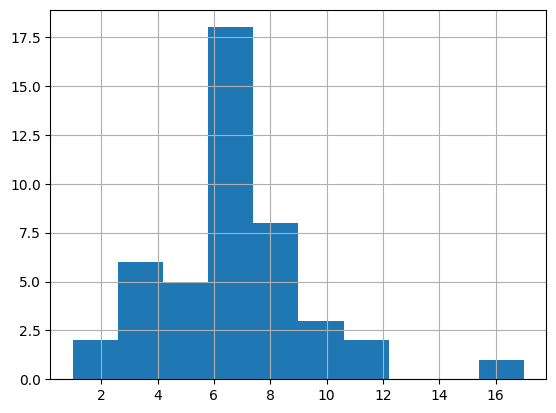

In [39]:
Data['Média da diferença'].hist()